# Initialize libraries

In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Import CSV File

In [2]:
df = pd.read_csv('US_counties_COVID19_health_weather_data.csv')
df

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790326,2020-12-04,Sweetwater,Wyoming,56037,2077,10.0,no,no,41.659538,-108.879567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790327,2020-12-04,Teton,Wyoming,56039,1724,2.0,no,no,43.934776,-110.589759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790328,2020-12-04,Uinta,Wyoming,56041,1175,5.0,no,no,41.287648,-110.547639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790329,2020-12-04,Washakie,Wyoming,56043,517,8.0,no,no,43.904970,-107.682819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#data shape
df.shape

(790331, 227)

In [4]:
# list of columns
df.columns.tolist()

['date',
 'county',
 'state',
 'fips',
 'cases',
 'deaths',
 'stay_at_home_announced',
 'stay_at_home_effective',
 'lat',
 'lon',
 'total_population',
 'area_sqmi',
 'population_density_per_sqmi',
 'num_deaths',
 'years_of_potential_life_lost_rate',
 'percent_fair_or_poor_health',
 'average_number_of_physically_unhealthy_days',
 'average_number_of_mentally_unhealthy_days',
 'percent_low_birthweight',
 'percent_smokers',
 'percent_adults_with_obesity',
 'food_environment_index',
 'percent_physically_inactive',
 'percent_with_access_to_exercise_opportunities',
 'percent_excessive_drinking',
 'num_alcohol_impaired_driving_deaths',
 'num_driving_deaths',
 'percent_driving_deaths_with_alcohol_involvement',
 'num_chlamydia_cases',
 'chlamydia_rate',
 'teen_birth_rate',
 'num_uninsured',
 'percent_uninsured',
 'num_primary_care_physicians',
 'primary_care_physicians_rate',
 'num_dentists',
 'dentist_rate',
 'num_mental_health_providers',
 'mental_health_provider_rate',
 'preventable_hospitali

# Feature Selection

In [5]:

# Define the list of selected columns
selected_columns = [
    'date',
    'county',
    'state',
    'cases',
    'deaths',
    'percent_smokers',
    'percent_adults_with_obesity',
    'median_household_income',
    'percent_uninsured',
    'mean_temp',
    'percent_drive_alone_to_work',
    'percent_black',
    'percent_hispanic',
    'percent_no_highschool_diploma',
    'percent_rural'
]

# Keep only the selected columns in the DataFrame
df_selected = df[selected_columns]
df_selected
#Now selected dataframe is suitable to work on

,date,county,state,cases,deaths,percent_smokers,percent_adults_with_obesity,median_household_income,percent_uninsured,mean_temp,percent_drive_alone_to_work,percent_black,percent_hispanic,percent_no_highschool_diploma,percent_rural
0,2020-01-21,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,44.1,74.114790,3.381270,10.444091,8.2,10.819461
1,2020-01-22,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,44.8,74.114790,3.381270,10.444091,8.2,10.819461
2,2020-01-23,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,49.9,74.114790,3.381270,10.444091,8.2,10.819461
3,2020-01-24,Cook,Illinois,1,0.0,13.776183,28.0,63347.0,9.972268,36.1,61.402350,23.041089,25.538438,14.2,0.045296
4,2020-01-24,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,51.5,74.114790,3.381270,10.444091,8.2,10.819461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790326,2020-12-04,Sweetwater,Wyoming,2077,10.0,18.073422,29.8,73315.0,14.464995,21.1,75.564220,1.145153,16.083250,9.3,10.916313
790327,2020-12-04,Teton,Wyoming,1724,2.0,14.546369,12.4,99087.0,16.034517,2.4,66.761667,0.632555,14.878038,4.6,46.430920
790328,2020-12-04,Uinta,Wyoming,1175,5.0,17.212675,35.8,63401.0,13.664737,25.2,77.293089,0.684763,9.236908,10.4,43.095937
790329,2020-12-04,Washakie,Wyoming,517,8.0,16.859400,28.8,55190.0,16.730280,17.9,78.931751,0.469245,14.051997,12.6,35.954529


# Rename Column

In [6]:
# Define a dictionary for renaming columns
rename_dict = {
    'date': 'Date',
    'county': 'County',
    'state': 'State',
    'cases': 'COVID_Cases',
    'deaths': 'COVID_Deaths',
    'percent_smokers': 'Percent_Smokers',
    'percent_adults_with_obesity': 'Percent_Obese',
    'median_household_income': 'Median_Income',
    'percent_uninsured': 'Percent_Uninsured',
    'mean_temp': 'Mean_Temperature',
    'percent_drive_alone_to_work': 'Percent_Drive_Alone',
    'percent_black': 'Percent_Black',
    'percent_hispanic': 'Percent_Hispanic',
    'percent_no_highschool_diploma': 'Percent_No_HS_Diploma',
    'percent_rural': 'Percent_Rural'
}

# Rename the columns
df_selected.rename(columns=rename_dict, inplace=True)

df_selected


,Date,County,State,COVID_Cases,COVID_Deaths,Percent_Smokers,Percent_Obese,Median_Income,Percent_Uninsured,Mean_Temperature,Percent_Drive_Alone,Percent_Black,Percent_Hispanic,Percent_No_HS_Diploma,Percent_Rural
0,2020-01-21,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,44.1,74.114790,3.381270,10.444091,8.2,10.819461
1,2020-01-22,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,44.8,74.114790,3.381270,10.444091,8.2,10.819461
2,2020-01-23,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,49.9,74.114790,3.381270,10.444091,8.2,10.819461
3,2020-01-24,Cook,Illinois,1,0.0,13.776183,28.0,63347.0,9.972268,36.1,61.402350,23.041089,25.538438,14.2,0.045296
4,2020-01-24,Snohomish,Washington,1,0.0,12.962309,28.9,87096.0,6.207640,51.5,74.114790,3.381270,10.444091,8.2,10.819461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790326,2020-12-04,Sweetwater,Wyoming,2077,10.0,18.073422,29.8,73315.0,14.464995,21.1,75.564220,1.145153,16.083250,9.3,10.916313
790327,2020-12-04,Teton,Wyoming,1724,2.0,14.546369,12.4,99087.0,16.034517,2.4,66.761667,0.632555,14.878038,4.6,46.430920
790328,2020-12-04,Uinta,Wyoming,1175,5.0,17.212675,35.8,63401.0,13.664737,25.2,77.293089,0.684763,9.236908,10.4,43.095937
790329,2020-12-04,Washakie,Wyoming,517,8.0,16.859400,28.8,55190.0,16.730280,17.9,78.931751,0.469245,14.051997,12.6,35.954529


In [7]:
#data type of each column
df_selected.dtypes

Date                      object
County                    object
State                     object
COVID_Cases                int64
COVID_Deaths             float64
Percent_Smokers          float64
Percent_Obese            float64
Median_Income            float64
Percent_Uninsured        float64
Mean_Temperature         float64
Percent_Drive_Alone      float64
Percent_Black            float64
Percent_Hispanic         float64
Percent_No_HS_Diploma    float64
Percent_Rural            float64
dtype: object

In [8]:
#specify each column in detail
df_selected.describe(include = 'object')

,Date,County,State
count,790331,790331,790331
unique,319,1928,54
top,2020-12-04,Washington,Texas
freq,3220,7940,60143


# Check Null Value

In [9]:
df_selected.isnull().sum()

Date                         0
County                       0
State                        0
COVID_Cases                  0
COVID_Deaths             16655
Percent_Smokers          17835
Percent_Obese            17835
Median_Income            17835
Percent_Uninsured        17835
Mean_Temperature         34244
Percent_Drive_Alone      18090
Percent_Black            17835
Percent_Hispanic         17835
Percent_No_HS_Diploma    17835
Percent_Rural            18942
dtype: int64

# Handeling Missing data with mode value

In [10]:

# Calculate mode for specified columns and assign mode value back to variables
mode_values = {
    'COVID_Deaths': df_selected['COVID_Deaths'].mode()[0],
    'Percent_Smokers': df_selected['Percent_Smokers'].mode()[0],
    'Percent_Obese': df_selected['Percent_Obese'].mode()[0],
    'Median_Income': df_selected['Median_Income'].mode()[0],
    'Percent_Uninsured': df_selected['Percent_Uninsured'].mode()[0],
    'Mean_Temperature': df_selected['Mean_Temperature'].mode()[0],
    'Percent_Drive_Alone': df_selected['Percent_Drive_Alone'].mode()[0],
    'Percent_Black': df_selected['Percent_Black'].mode()[0],
    'Percent_Hispanic': df_selected['Percent_Hispanic'].mode()[0],
    'Percent_No_HS_Diploma': df_selected['Percent_No_HS_Diploma'].mode()[0],
    'Percent_Rural': df_selected['Percent_Rural'].mode()[0]
}

# Fill NaN values with mode using fillna() and the mode values dictionary
df_selected.fillna(value=mode_values, inplace=True)

# Convert 'COVID_Deaths' column to integers
df_selected['COVID_Deaths'] = df_selected['COVID_Deaths'].astype(int)

df_selected.head()




,Date,County,State,COVID_Cases,COVID_Deaths,Percent_Smokers,Percent_Obese,Median_Income,Percent_Uninsured,Mean_Temperature,Percent_Drive_Alone,Percent_Black,Percent_Hispanic,Percent_No_HS_Diploma,Percent_Rural
0,2020-01-21,Snohomish,Washington,1,0,12.962309,28.9,87096.0,6.207640,44.1,74.11479,3.381270,10.444091,8.2,10.819461
1,2020-01-22,Snohomish,Washington,1,0,12.962309,28.9,87096.0,6.207640,44.8,74.11479,3.381270,10.444091,8.2,10.819461
2,2020-01-23,Snohomish,Washington,1,0,12.962309,28.9,87096.0,6.207640,49.9,74.11479,3.381270,10.444091,8.2,10.819461
3,2020-01-24,Cook,Illinois,1,0,13.776183,28.0,63347.0,9.972268,36.1,61.40235,23.041089,25.538438,14.2,0.045296
4,2020-01-24,Snohomish,Washington,1,0,12.962309,28.9,87096.0,6.207640,51.5,74.11479,3.381270,10.444091,8.2,10.819461


# Check data skewness

In [11]:
# List of columns to calculate skewness for
columns_to_check = ['COVID_Deaths', 'Percent_Smokers', 'Percent_Obese', 'Median_Income', 
                    'Percent_Uninsured', 'Mean_Temperature', 'Percent_Drive_Alone', 
                    'Percent_Black', 'Percent_Hispanic', 'Percent_No_HS_Diploma', 
                    'Percent_Rural']

# Loop through each column in the list
for column in columns_to_check:
    # Calculate the skewness for the current column
    skewness = df_selected[column].skew()
    
    # Print the skewness of the current column
    print(f'The skewness of {column} is: {skewness}')


The skewness of COVID_Deaths is: 41.92472513442799
The skewness of Percent_Smokers is: 0.8405904102065972
The skewness of Percent_Obese is: -0.04964429266891221
The skewness of Median_Income is: 1.5021567006966297
The skewness of Percent_Uninsured is: 0.8353517024407183
The skewness of Mean_Temperature is: -0.7341581206126585
The skewness of Percent_Drive_Alone is: -2.8925649855830224
The skewness of Percent_Black is: 2.276554802103761
The skewness of Percent_Hispanic is: 3.096545442035457
The skewness of Percent_No_HS_Diploma is: 1.0062990805269008
The skewness of Percent_Rural is: -0.13490398136459825


# Visualize outliers

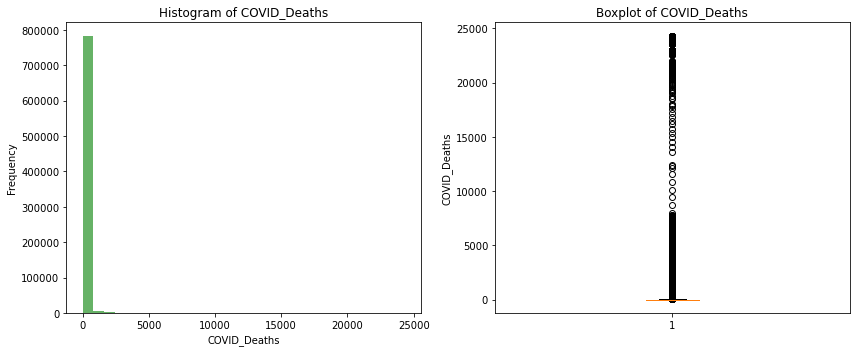

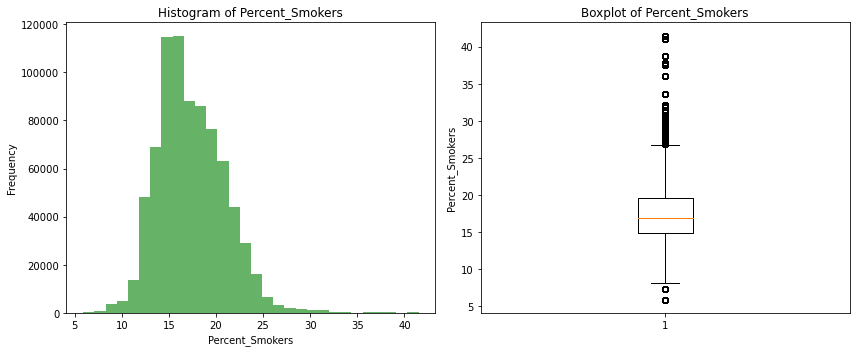

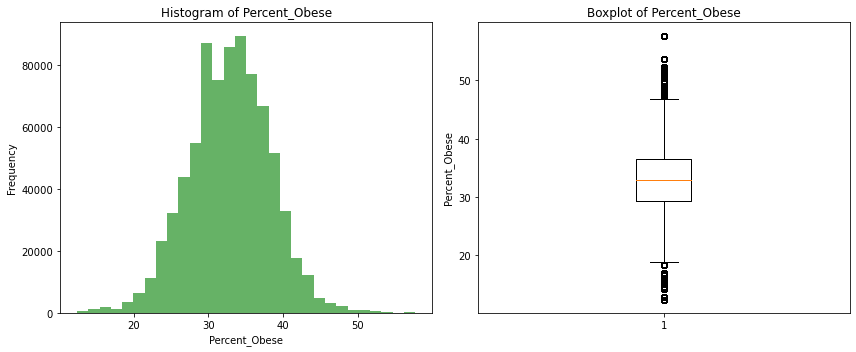

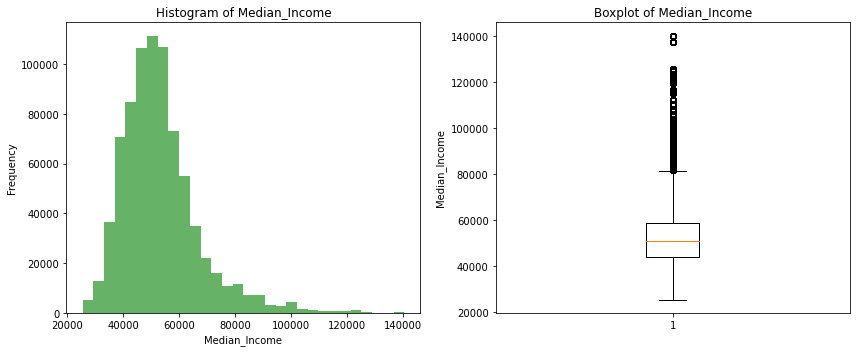

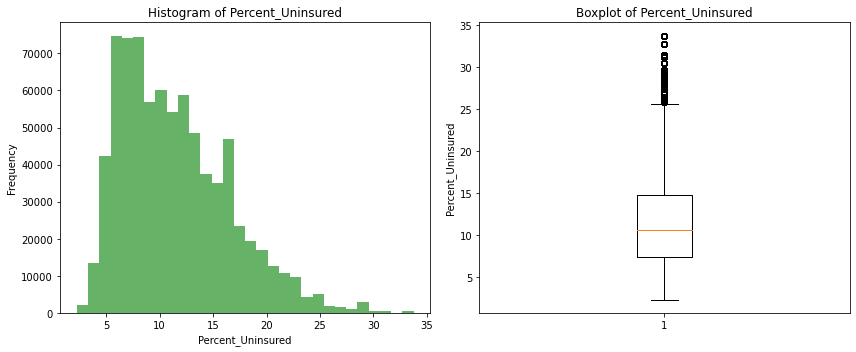

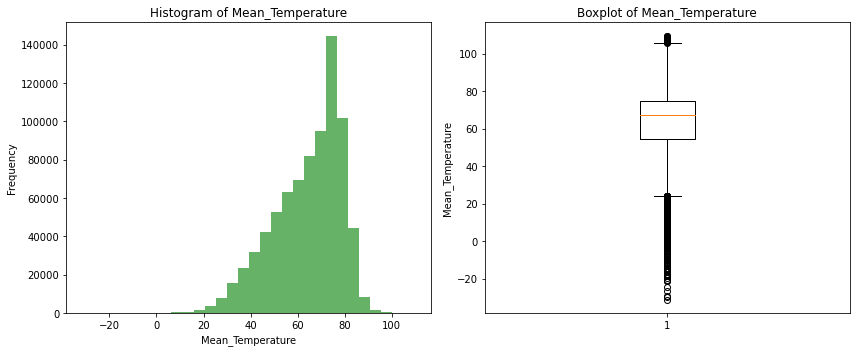

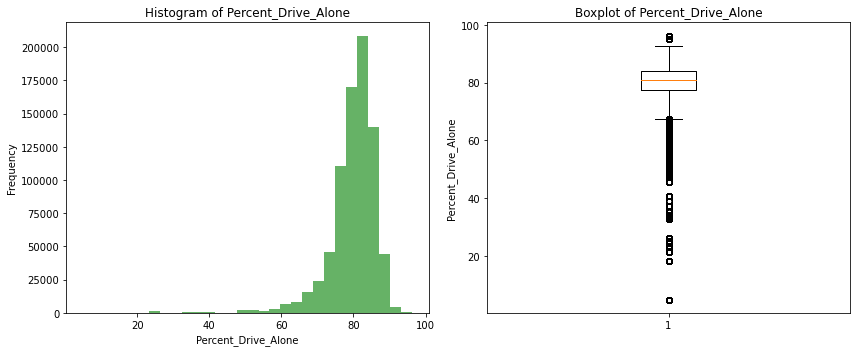

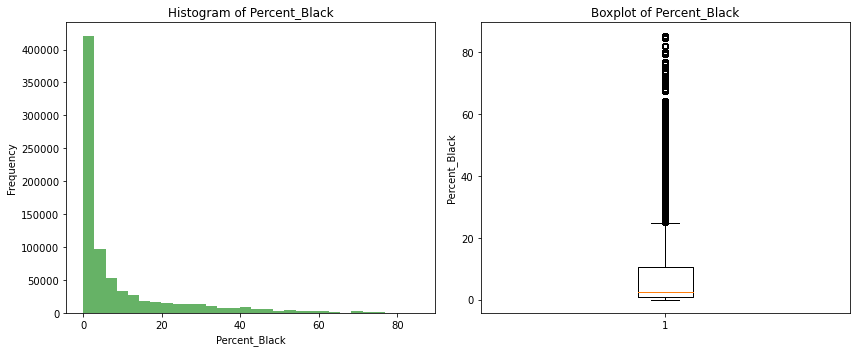

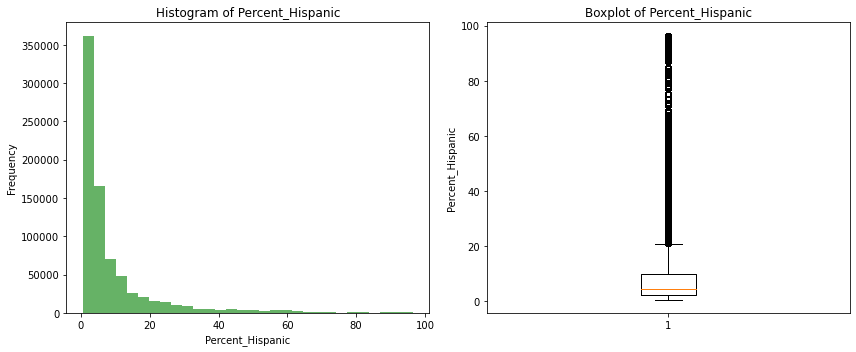

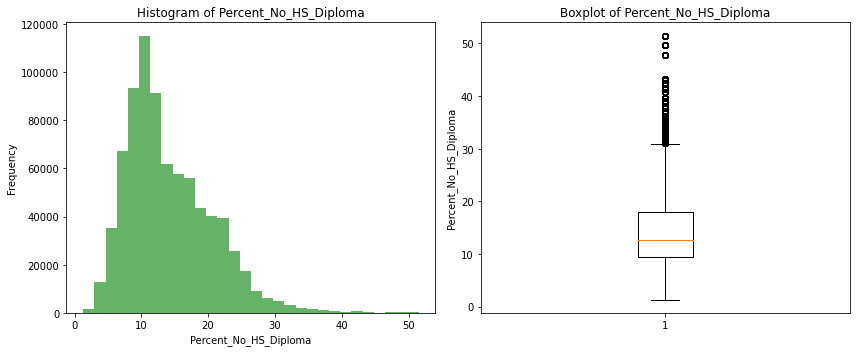

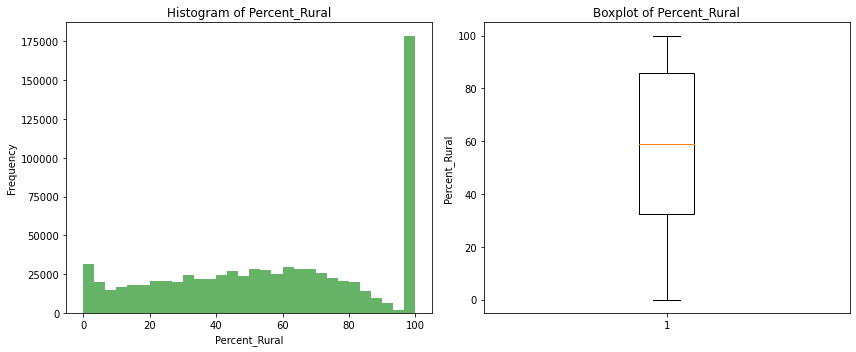

In [14]:
# List of columns to visualize
columns_to_visualize = ['COVID_Deaths', 'Percent_Smokers', 'Percent_Obese', 'Median_Income', 
                        'Percent_Uninsured', 'Mean_Temperature', 'Percent_Drive_Alone', 
                        'Percent_Black', 'Percent_Hispanic', 'Percent_No_HS_Diploma', 
                        'Percent_Rural']

# Loop through each column in the list
for column in columns_to_visualize:
    # Create a new figure with a specified size
    plt.figure(figsize=(12, 5))
    
    # Create a subplot for the histogram
    plt.subplot(1, 2, 1)
    plt.hist(df_selected[column], bins=30, alpha=0.6, color='g')  # Plot the histogram
    plt.title(f'Histogram of {column}')  # Set the title of the histogram
    plt.xlabel(column)  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    
    # Create a subplot for the boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df_selected[column])  # Plot the boxplot
    plt.title(f'Boxplot of {column}')  # Set the title of the boxplot
    plt.ylabel(column)  # Label the y-axis
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    
    # Display the plots
    plt.show()


# Remove Outliers

In [15]:
def remove_outliers_iqr(df, column):
    # Calculate the Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower bound and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return the DataFrame with outliers removed
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a copy of the DataFrame to keep the original data intact
cleaned_df_selected = df_selected.copy()

# List of columns to remove outliers from
columns_to_clean = ['COVID_Deaths', 'Percent_Smokers', 'Percent_Obese', 'Median_Income', 
                    'Percent_Uninsured', 'Mean_Temperature', 'Percent_Drive_Alone', 
                    'Percent_Black', 'Percent_Hispanic', 'Percent_No_HS_Diploma', 
                    'Percent_Rural']

# Loop through each column and remove outliers
for column in columns_to_clean:
    cleaned_df_selected = remove_outliers_iqr(cleaned_df_selected, column)

# Update the original DataFrame with the cleaned data
df_selected = cleaned_df_selected

# Display the cleaned DataFrame
df_selected


,Date,County,State,COVID_Cases,COVID_Deaths,Percent_Smokers,Percent_Obese,Median_Income,Percent_Uninsured,Mean_Temperature,Percent_Drive_Alone,Percent_Black,Percent_Hispanic,Percent_No_HS_Diploma,Percent_Rural
87,2020-02-06,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,24.4,73.359422,5.214764,6.425021,4.7,12.329918
105,2020-02-08,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,25.7,73.359422,5.214764,6.425021,4.7,12.329918
114,2020-02-09,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,24.5,73.359422,5.214764,6.425021,4.7,12.329918
189,2020-02-16,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,25.4,73.359422,5.214764,6.425021,4.7,12.329918
198,2020-02-17,Douglas,Nebraska,10,0,15.893614,30.1,64580.0,9.982781,42.5,82.771756,11.042549,12.828288,10.6,2.170525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790318,2020-12-04,Laramie,Wyoming,5682,28,17.042886,30.0,63839.0,11.433545,33.9,81.890221,2.417758,14.795506,6.7,19.784604
790323,2020-12-04,Platte,Wyoming,352,8,14.149228,30.1,54165.0,14.882548,30.1,78.918533,0.583703,8.475368,9.7,58.647744
790324,2020-12-04,Sheridan,Wyoming,2134,11,15.214185,28.2,58307.0,13.386562,27.3,78.289918,0.797142,4.342937,6.1,35.478775
790328,2020-12-04,Uinta,Wyoming,1175,5,17.212675,35.8,63401.0,13.664737,25.2,77.293089,0.684763,9.236908,10.4,43.095937


# Data Visualization

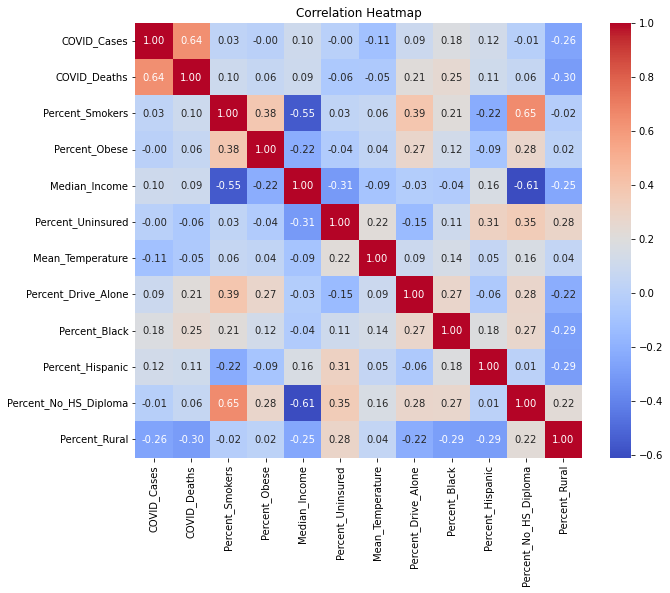

In [16]:


# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


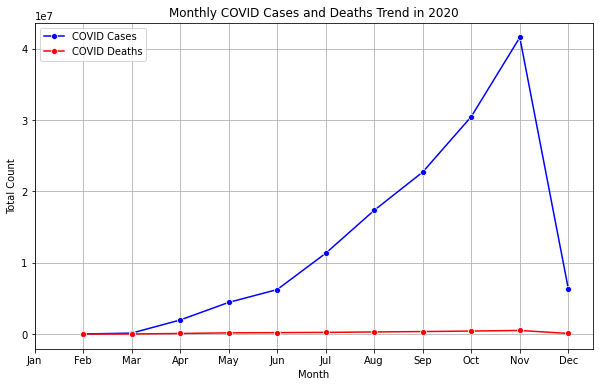

In [17]:


# Extract year and month from the 'Date' column
df_selected['Year'] = pd.to_datetime(df_selected['Date']).dt.year
df_selected['Month'] = pd.to_datetime(df_selected['Date']).dt.month

# Filter data for the desired year
desired_year = 2020
df_desired_year = df_selected[df_selected['Year'] == desired_year]

# Group by month and sum the COVID cases and deaths for each month
monthly_cases = df_desired_year.groupby('Month')[['COVID_Cases', 'COVID_Deaths']].sum().reset_index()

# Plot monthly COVID cases and deaths
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_cases, x='Month', y='COVID_Cases', marker='o', color='b', label='COVID Cases')
sns.lineplot(data=monthly_cases, x='Month', y='COVID_Deaths', marker='o', color='r', label='COVID Deaths')
plt.title(f'Monthly COVID Cases and Deaths Trend in {desired_year}')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


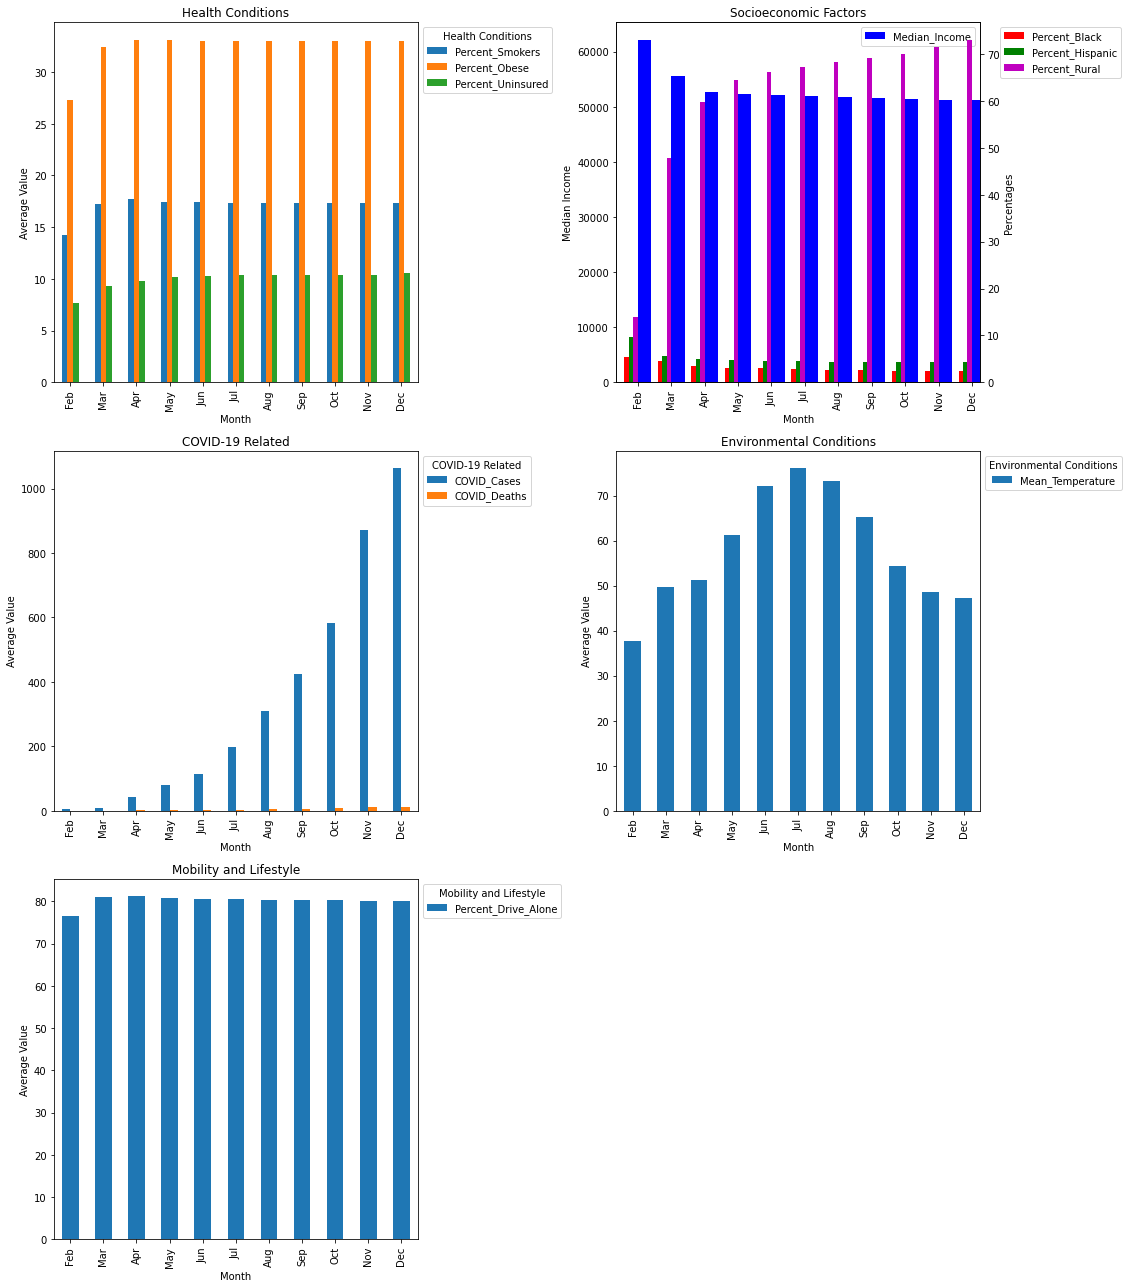

In [18]:


# Convert the 'Date' column to datetime format if not already in that format
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# Extract 'Year' and 'Month' from the 'Date' column and add them as new columns
df_selected['Year'] = df_selected['Date'].dt.year
df_selected['Month'] = df_selected['Date'].dt.month

# Map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Group the data by 'Month' and calculate the mean for each column of interest
monthly_avg = df_selected.groupby('Month').agg({
    'Percent_Smokers': 'mean',
    'Percent_Obese': 'mean',
    'Percent_Uninsured': 'mean',
    'COVID_Deaths': 'mean',
    'COVID_Cases': 'mean',
    'Median_Income': 'mean',
    'Percent_Black': 'mean',
    'Percent_Hispanic': 'mean',
    'Percent_Rural': 'mean',
    'Mean_Temperature': 'mean',
    'Percent_Drive_Alone': 'mean'
}).reset_index()

# Replace month numbers with month names
monthly_avg['Month'] = monthly_avg['Month'].map(month_names)

# Set 'Month' as the index
monthly_avg.set_index('Month', inplace=True)

# Create subplots for different categories of data
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot health conditions
health_conditions = ['Percent_Smokers', 'Percent_Obese', 'Percent_Uninsured']
monthly_avg[health_conditions].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Health Conditions')
axes[0, 0].set_ylabel('Average Value')
axes[0, 0].legend(title='Health Conditions', loc='upper left', bbox_to_anchor=(1, 1))

# Plot socioeconomic factors with dual y-axes for better clarity
socioeconomic_factors = ['Median_Income', 'Percent_Black', 'Percent_Hispanic', 'Percent_Rural']
ax1 = axes[0, 1]
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot Median_Income on the primary y-axis with a different color
monthly_avg['Median_Income'].plot(kind='bar', ax=ax1, color='b', position=0, width=0.4)
# Plot other socioeconomic factors on the secondary y-axis
monthly_avg[['Percent_Black', 'Percent_Hispanic', 'Percent_Rural']].plot(kind='bar', ax=ax2, position=1, width=0.4, color=['r', 'g', 'm'])

# Set titles and labels for the axes
ax1.set_title('Socioeconomic Factors')
ax1.set_ylabel('Median Income')
ax2.set_ylabel('Percentages')

# Adjust legend positions for clarity
ax1.legend(['Median_Income'], loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(['Percent_Black', 'Percent_Hispanic', 'Percent_Rural'], loc='upper right', bbox_to_anchor=(1.4, 1))

# Plot COVID-19 related data
covid_related = ['COVID_Cases', 'COVID_Deaths']
monthly_avg[covid_related].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('COVID-19 Related')
axes[1, 0].set_ylabel('Average Value')
axes[1, 0].legend(title='COVID-19 Related', loc='upper left', bbox_to_anchor=(1, 1))

# Plot environmental conditions
environmental_conditions = ['Mean_Temperature']
monthly_avg[environmental_conditions].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Environmental Conditions')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].legend(title='Environmental Conditions', loc='upper left', bbox_to_anchor=(1, 1))

# Plot mobility and lifestyle data
mobility_lifestyle = ['Percent_Drive_Alone']
monthly_avg[mobility_lifestyle].plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Mobility and Lifestyle')
axes[2, 0].set_ylabel('Average Value')
axes[2, 0].legend(title='Mobility and Lifestyle', loc='upper left', bbox_to_anchor=(1, 1))

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust the layout to prevent overlap and improve clarity
plt.tight_layout()
plt.show()


In [20]:
# Step 1: Identify columns with non-numeric data types
non_numeric_columns = df_selected.select_dtypes(exclude=['number']).columns

# Step 2: Convert non-numeric columns to numerical format or remove them
X = df_selected.drop(columns=non_numeric_columns)  # Assuming 'df' is your DataFrame
y = df_selected['COVID_Cases']  # Assuming 'COVID_Cases' is the target variable

# Step 3: Train the models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Train models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
gradient_boosting_pred = gradient_boosting.predict(X_test)

# Evaluate models
models = {
    'Linear Regression': linear_reg_pred,
    'Decision Tree': decision_tree_pred,
    'Random Forest': random_forest_pred,
    'Gradient Boosting': gradient_boosting_pred
}

for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2) Score: {r2}")
    print()


Linear Regression:
Mean Squared Error (MSE): 1.7219657439987777e-20
Root Mean Squared Error (RMSE): 1.3122369237293919e-10
Mean Absolute Error (MAE): 7.778391957150676e-11
R-squared (R2) Score: 1.0

Decision Tree:
Mean Squared Error (MSE): 1.1115492573610464
Root Mean Squared Error (RMSE): 1.0543003639196216
Mean Absolute Error (MAE): 0.031716990351943815
R-squared (R2) Score: 0.9999969833937179

Random Forest:
Mean Squared Error (MSE): 0.33985920088185007
Root Mean Squared Error (RMSE): 0.5829744427347138
Mean Absolute Error (MAE): 0.019296453288181217
R-squared (R2) Score: 0.9999990776644457

Gradient Boosting:
Mean Squared Error (MSE): 38.64884796297805
Root Mean Squared Error (RMSE): 6.216819762786923
Mean Absolute Error (MAE): 2.9928335485750135
R-squared (R2) Score: 0.9998951118389129



In [21]:
df_selected

,Date,County,State,COVID_Cases,COVID_Deaths,Percent_Smokers,Percent_Obese,Median_Income,Percent_Uninsured,Mean_Temperature,Percent_Drive_Alone,Percent_Black,Percent_Hispanic,Percent_No_HS_Diploma,Percent_Rural,Year,Month
87,2020-02-06,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,24.4,73.359422,5.214764,6.425021,4.7,12.329918,2020,2
105,2020-02-08,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,25.7,73.359422,5.214764,6.425021,4.7,12.329918,2020,2
114,2020-02-09,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,24.5,73.359422,5.214764,6.425021,4.7,12.329918,2020,2
189,2020-02-16,Dane,Wisconsin,1,0,12.442924,22.6,71789.0,5.061298,25.4,73.359422,5.214764,6.425021,4.7,12.329918,2020,2
198,2020-02-17,Douglas,Nebraska,10,0,15.893614,30.1,64580.0,9.982781,42.5,82.771756,11.042549,12.828288,10.6,2.170525,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790318,2020-12-04,Laramie,Wyoming,5682,28,17.042886,30.0,63839.0,11.433545,33.9,81.890221,2.417758,14.795506,6.7,19.784604,2020,12
790323,2020-12-04,Platte,Wyoming,352,8,14.149228,30.1,54165.0,14.882548,30.1,78.918533,0.583703,8.475368,9.7,58.647744,2020,12
790324,2020-12-04,Sheridan,Wyoming,2134,11,15.214185,28.2,58307.0,13.386562,27.3,78.289918,0.797142,4.342937,6.1,35.478775,2020,12
790328,2020-12-04,Uinta,Wyoming,1175,5,17.212675,35.8,63401.0,13.664737,25.2,77.293089,0.684763,9.236908,10.4,43.095937,2020,12


# save file in my pc

In [23]:
df_selected.to_csv(r'C:\Users\Lenovo\OneDrive\Desktop\df_selected.csv', index=False)
